In [103]:
import pandas as pd
import numpy as np


In [104]:
df=pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [105]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True, errors='ignore')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
df.rename(columns={'v1':'label','v2':'message'}, inplace=True)

In [107]:
df.sample(5)

,label,message
2102,ham,Audrie lousy autocorrect
4741,ham,Ya very nice. . .be ready on thursday
26,ham,Lol your always so convincing.
4966,spam,You can donate å£2.50 to UNICEF's Asian Tsunam...
3697,ham,S:)but he had some luck.2 catches put down:)


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

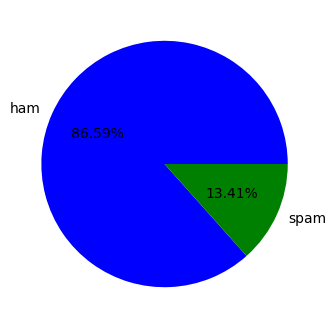

In [109]:
plt.figure(figsize=(6,4))
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index, autopct='%0.2f%%', colors=['blue', 'green'])
plt.show()

In [110]:
df.duplicated().sum()

np.int64(403)

In [111]:
df.drop_duplicates(inplace=True)

In [112]:
df.duplicated().sum()

np.int64(0)

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [115]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
df.shape

(5169, 2)

In [117]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [118]:
import nltk 

In [119]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Al
[nltk_data]     hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
df['characters']=df['message'].apply(len)

In [121]:
df.head()

,label,message,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [122]:
nltk.download('punkt_tab')
df['words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to C:\Users\Al
[nltk_data]     hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [123]:
df.head()

,label,message,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [124]:
df['sentences']=df['message'].apply(lambda x:len (nltk.sent_tokenize(x)))

In [125]:
df.sample(5)

,label,message,characters,words,sentences
3130,1,LookAtMe!: Thanks for your purchase of a video...,156,37,4
1215,0,that would be good Û_ I'll phone you tomo lun...,85,19,1
18,0,Fine if thatåÕs the way u feel. ThatåÕs the wa...,58,14,2
3762,0,K.i will send in &lt;#&gt; min:),34,14,1
5441,0,"By the way, make sure u get train to worc fore...",90,21,2


In [126]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [139]:
df[df['label'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [140]:
df[df['label']==1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

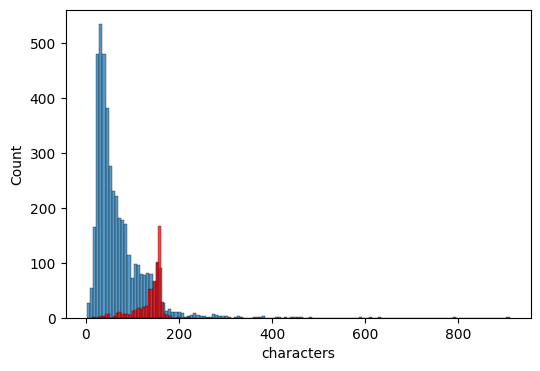

In [141]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['label'] == 0]['characters'])
sns.histplot(df[df['label'] == 1]['characters'], color='red')

<Axes: xlabel='words', ylabel='Count'>

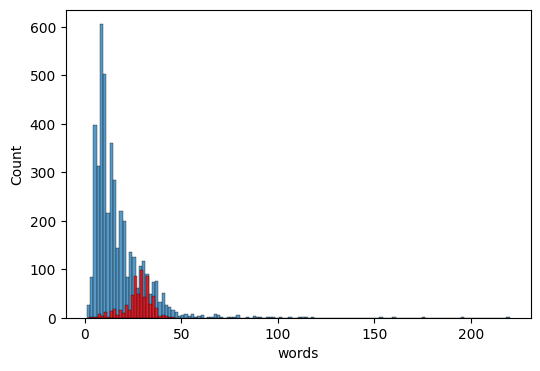

In [142]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['label'] == 0]['words'])
sns.histplot(df[df['label'] == 1]['words'],color='red')

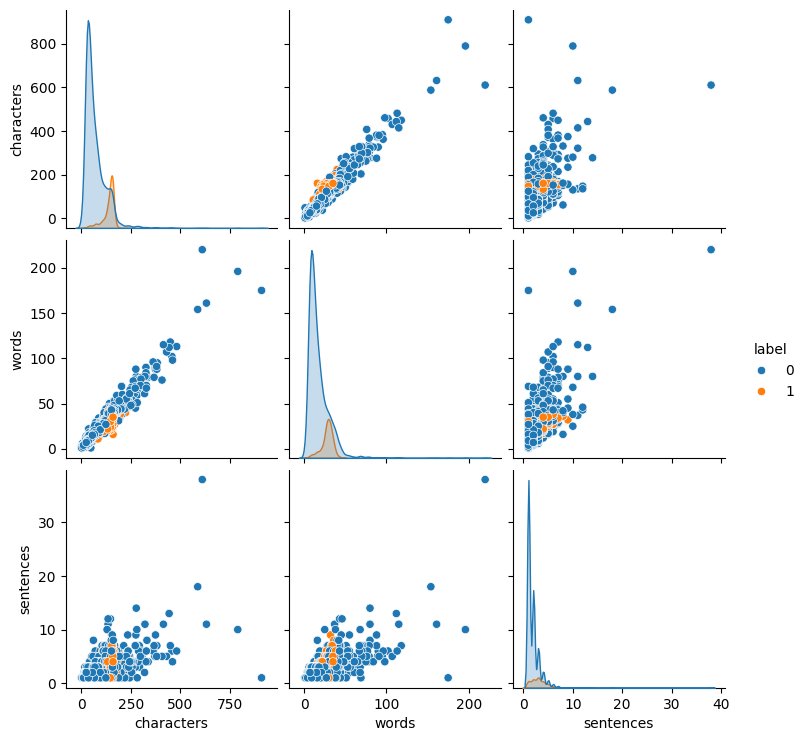

In [143]:
sns.pairplot(df,hue='label')

<Axes: >

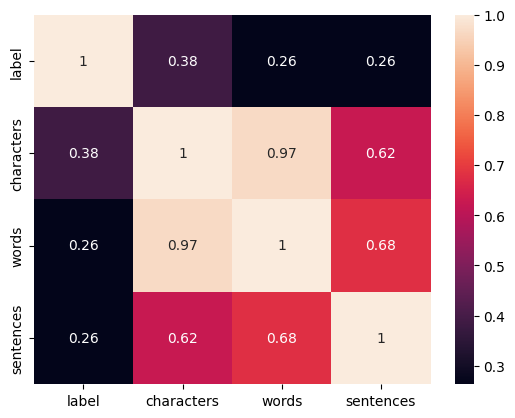

In [145]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [152]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')


[nltk_data] Downloading package stopwords to C:\Users\Al
[nltk_data]     hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [150]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [153]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [154]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [155]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [159]:
df['transformed_msg']=df['message'].apply(transform_text)

In [160]:
df.head()

,label,message,characters,words,sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


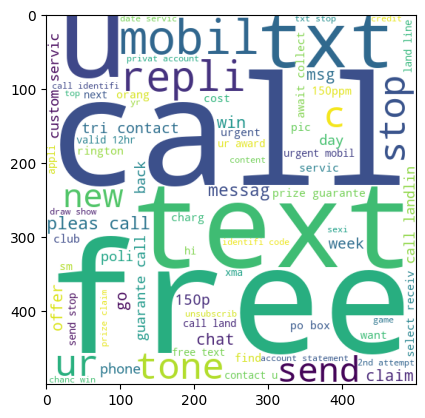

In [168]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_msg'].str.cat(sep=" "))
plt.imshow(spam_wc)

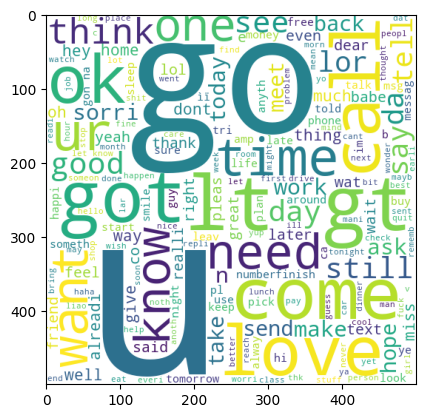

In [164]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['label'] == 0]['transformed_msg'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [170]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9939

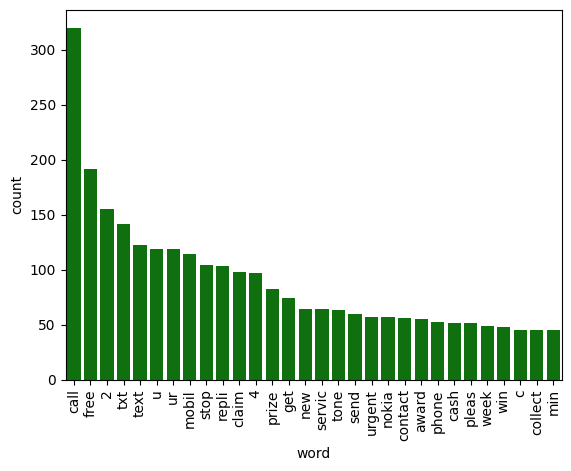

In [173]:
from collections import Counter
top_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_words_df,color='green')
plt.xticks(rotation='vertical')
plt.show()

In [177]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_msg'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [179]:
len(ham_corpus)

35404

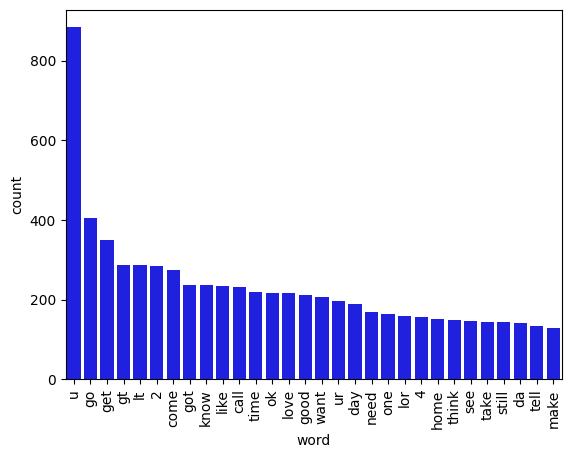

In [180]:
from collections import Counter
top_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_words_df,color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [181]:
df.head()

,label,message,characters,words,sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Training:

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)


In [186]:
x= tfidf.fit_transform(df['transformed_msg']).toarray()

In [187]:
x.shape

(5169, 3000)

In [189]:
y=df['label'].values

In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [192]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))